## Imports

In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn


In [3]:
if os.path.realpath(".").split(os.path.sep)[-1] != "Quant-Finance":
    os.chdir("..")

In [4]:
import quant as qt
from importlib import reload

reload(qt)


<module 'quant' from '/Users/nakulrandad/Development/Quant-Finance/quant/__init__.py'>

In [5]:
import quant as qt

qt.plot.set_plot_options()


## Get Data

In [4]:
bse_p = pd.read_pickle(os.path.join("data", "BSE", "BSE_index_levels.pkl"))
bse_r = bse_p.pct_change()


In [5]:
bse_r.quant.sharpe(rfr=0.06).rename("sharpe").to_frame().sort_values(
    "sharpe"
).style.background_gradient()


,sharpe
telecom,0.063777
utilities,0.146609
power,0.190120
realty,0.219757
commodities,0.271215
psu,0.284679
consumer_discretionary,0.331275
enhanced_value,0.355007
energy,0.361821
oil_gas,0.364987


<Axes: >

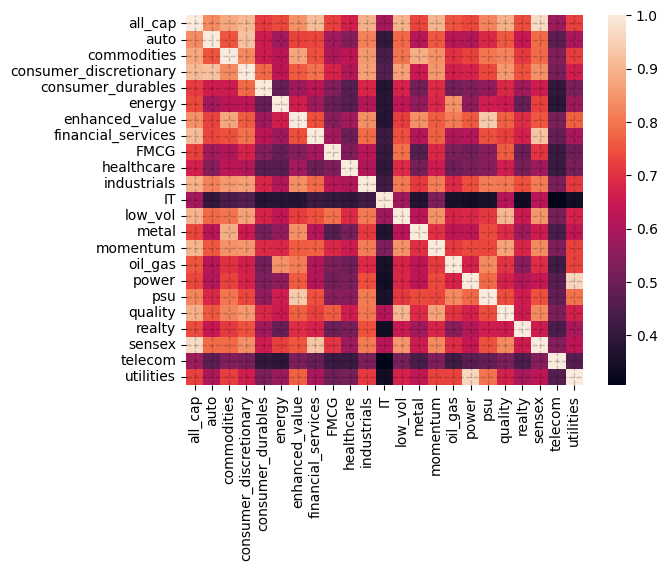

In [6]:
corr = bse_r.dropna().corr()
sn.heatmap(corr)


<Axes: >

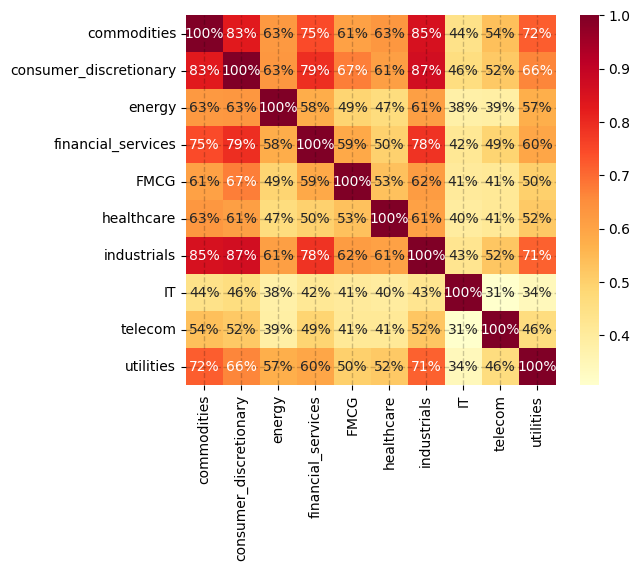

In [14]:
sectors = [
    "commodities",
    "consumer_discretionary",
    "energy",
    "financial_services",
    "FMCG",
    "healthcare",
    "industrials",
    "IT",
    "telecom",
    "utilities",
]
sn.heatmap(
    corr.loc[sectors, sectors],
    cmap="YlOrRd",
    square=True,
    annot=True,
    fmt=".0%",
)


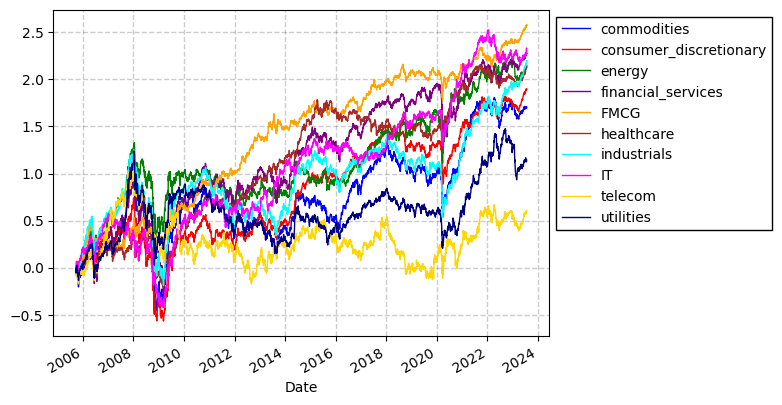

In [15]:
bse_r[sectors].dropna().quant.a2l().cumsum().plot()
plt.legend(bbox_to_anchor=(1, 1))
